# 实验一 知识表示与推理实验——基于搜索算法的机器人路径规划

## 姓名

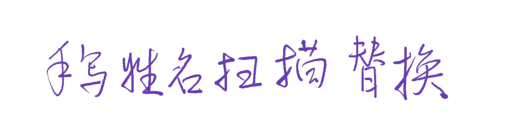

In [1]:
import skimage; import matplotlib.pyplot as plt
%matplotlib inline
name_img=skimage.io.imread(r'姓名.jpg'); plt.imshow(name_img); _=plt.axis('off')

## 学号

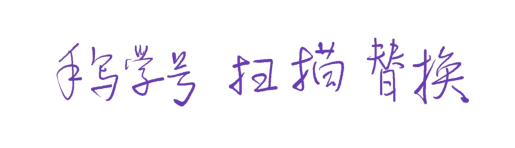

In [2]:
no_img=skimage.io.imread(r'学号.jpg');plt.imshow(no_img); _=plt.axis('off')

## 班级

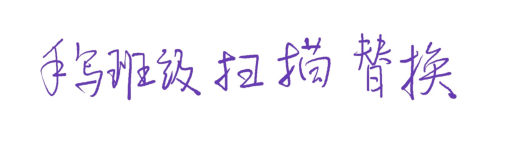

In [3]:
class_img=skimage.io.imread(r'班级.jpg');plt.imshow(class_img); _=plt.axis('off')

## 一、实验目的

- 掌握知识表示的基本方法（状态空间法、谓词逻辑、语义网络等），并将其应用于移动机器人路径规划问题建模。
- 理解搜索算法（深度优先搜索、广度优先搜索、A算法、A*算法）的核心原理及在路径规划中的应用。
- 通过编程实现搜索算法，完成移动机器人从起点到目标点的路径搜索与优化。
- 分析不同搜索算法的优缺点，对比其在路径规划中的性能差异。

## 二、实验原理

### 1. 知识表示与路径规划建模

路径规划是指在给定的环境中，找到从起点到终点的最优路径，以最小化成本或时间。结合课程中介绍的知识表示方法，路径规划中的关键要素包括：

**状态空间法**：将机器人移动问题抽象为状态空间中的搜索问题（状态表示、操作符定义、目标状态判定）。
**图表示法**：将环境建模为图（节点表示位置，边表示可移动路径），并使用图搜索算法（如广度优先搜索、深度优先搜索、A*算法）解决路径规划问题。

**启发函数**：在A*算法中，定义启发函数（如曼哈顿距离、欧几里得距离）评估节点优先级，提高搜索效率。

### 2. 可以采用的搜搜算法

- 广度优先搜索（BFS）：
  - 算法思想：从起点开始，逐层扩展搜索空间，直到找到目标状态。
  - 优点：简单直观，适用于最短路径问题。
  - 缺点：可能无法找到最优解，搜索效率低，特别是搜索空间较大。

- 深度优先搜索（DFS）：
  - 算法思想：从起点开始，沿着一条路径尽可能深入搜索，直到无法继续为止，然后回溯到上一个节点继续搜索。
  - 优点：可以找到最优解，适用于求解迷宫问题等。
  - 缺点：可能陷入局部最优解，搜索效率低，特别是搜索空间较大。
  
- A*算法：
  - 算法思想：结合广度优先搜索和启发函数，通过评估节点优先级来优化搜索效率。
  - 优点：能够找到最优解，适用于复杂环境中的路径规划。
  - 缺点：需要定义启发函数，可能无法找到最优解，特别是在搜索空间较大时。
  
- 动态规划算法：
  - 算法思想：将问题分解为子问题，并通过存储子问题的解来避免重复计算。
  - 优点：可以找到最优解，适用于具有重叠子问题的路径规划问题。
  - 缺点：需要存储子问题的解，可能占用大量内存，特别是在搜索空间较大时。

### 3. 路径规划问题的建模过程

路径规划问题的建模过程通常包括以下几个步骤：

1. **状态表示**：机器人当前位置（x, y）、方向、已访问状态。
   
2. **操作符**：移动方向（上、下、左、右、对角线）及代价计算。
   
3. **环境建模**：二维网格地图（障碍物、自由空间）。


## 三、实验内容与步骤

### 1. 环境搭建

本次实验中使用的环境模型是横向、纵向各有20个小格的栅格地图。在该环境模型中，机器人的路径规划问题可以概括为以下几步：

(1) 从设定的起始点抵达设定的终点。

(2) 机器人在移动过程中不能碰撞障碍物，否则失败。

(3) 在满足以上条件的情况下，要使得机器人的行动路线尽可能地符合规划路径短的评价指标条件。

将机器人作为一个极小的质点，并按照实际的尺寸比例来模拟障碍物大小，将其投影到栅格子中。把障碍物映射到的环境格子设置成黑色格子，绿色格子为安全区域。这里将障碍物映射到的格子，无论其在格子中的占比有多少，都统一将其整个格子涂黑，作为障碍物的映射区域。机器人通过在安全区域(即：绿色格子)上点到点的移动，连接成规划路径。

In [4]:
#如果你的环境中没有pygame，那么需要用底下的指令安装pygame
#!pip install pygame

In [5]:
# 定义全局变量
import globalVar
globalVar._init()
globalVar.set_value('CELL_WIDTH', 16) #单元格宽度
globalVar.set_value('CELL_HEIGHT',16) #单元格长度
globalVar.set_value('BORDER_WIDTH', 1) #边框宽度
globalVar.set_value('BLOCK_NUM', 70) #地图中的障碍物数量
globalVar.set_value('TEST_NUM', 15) #实验测试次数

In [6]:
import matplotlib.pyplot as plt
import skimage
from aboutMap import Color, Map, generate_random_obstacles
from aboutResults import showResults, saveResultImg

pygame 2.6.1 (SDL 2.28.4, Python 3.9.21)
Hello from the pygame community. https://www.pygame.org/contribute.html


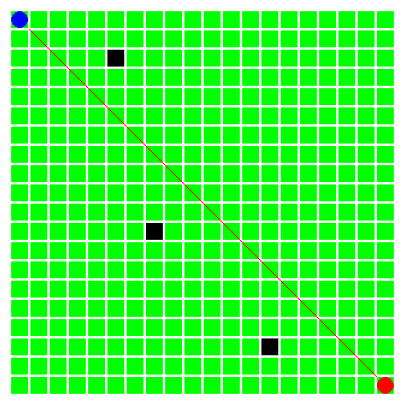

In [7]:
# 构建地图
# 使用tuple和map函数创建一个20×20的栅格地图
# map函数将(20,20)中的每个元素转换为整数，然后用tuple将结果转换为元组
mapsize = tuple(map(int, (20,20)))  #产生一个20×20的栅格地图

# 设置起点坐标(0,0)，即地图左上角
# 同样使用tuple和map函数将坐标转换为整数元组
pos_snode = tuple(map(int, (0,0)))  #设置机器人运动的起点为地图中左上角

# 设置终点坐标(19,19)，即地图右下角
pos_enode = tuple(map(int, (19,19))) #设置机器人运动的终点为地图的右下角

# 定义障碍物列表，每个元素为障碍物的坐标点
# 在地图中会用黑色方块表示这些障碍物
blocklist=[(5,2), (7,11), (13, 17)]

# 定义机器人可以经过的路径点列表
# 这些点将在地图上用红色线连接，表示机器人的运动轨迹
# 当前路径是一条从(1,1)到(19,19)的对角线
routelist=[(1,1), (2,2), (3,3), (4,4),(5,5),(6,6), (7,7), (8,8), (9,9), (10,10),
           (11,11),(12,12), (13,13),(14,14),(15,15),(16,16),(17,17),(18,18),(19,19)]

# 调用saveResultImg函数将地图保存为图片
# 函数参数包括：地图大小、起点、终点、障碍物列表和路径列表
saveResultImg(mapsize, pos_snode, pos_enode, blocklist, routelist)

# 创建一个5x5英寸的图形窗口
plt.figure(figsize=(5,5))

# 使用skimage库读取生成的地图图片
img1= skimage.io.imread('result0.png')

# 显示图片
plt.imshow(img1)

# 关闭坐标轴显示
plt.axis('off')

# 展示图片
plt.show()

### 2. 基于深度优先搜索的路径规划

首先对搜索算法中的节点进行定义：

In [8]:
class Node:
    """
    节点类：用于搜索算法中表示路径规划的节点
    属性:
        position: 节点在地图中的位置坐标
        g_cost: 从起点到当前节点的实际代价
        h_cost: 从当前节点到目标点的估计代价（启发式值）
        parent: 父节点，用于回溯最终路径
    """
    def __init__(self, position, g_cost=float('inf'), h_cost=0):
        """
        初始化节点
        参数:
            position: 节点位置坐标
            g_cost: 从起点到该节点的代价，默认为无穷大
            h_cost: 预估的到终点的代价，默认为0
        """
        self.position = position    # 存储节点的位置坐标
        self.g_cost = g_cost       # 从起点到当前节点的实际代价
        self.h_cost = h_cost       # 从当前节点到目标的估计代价
        self.parent = None         # 父节点，初始化为None
        
    def f_cost(self):
        """
        计算节点的f值
        返回:
            f值 = g值（实际代价）+ h值（估计代价）
        """
        return self.g_cost + self.h_cost
    
    def __lt__(self, other):
        """
        重载小于运算符，用于优先队列的比较
        参数:
            other: 另一个Node对象
        返回:
            当前节点的f值是否小于另一个节点的f值
        """
        return self.f_cost() < other.f_cost()

定义搜索算法，以深度优先搜索为例。

In [9]:
def dfs(start, goal, obstacles, mapsize=(20, 20)):
    """
    深度优先搜索算法实现
    
    参数:
        start: 起始位置坐标 (x, y)
        goal: 目标位置坐标 (x, y)
        mapsize: 地图大小 (width, height)
        obstacles: 障碍物位置列表
        
    返回:
        path: 找到的路径列表，如果没找到则返回None
    """
    # 定义移动方向：上、右、下、左
    directions = [(0, -1), (1, 0), (0, 1), (-1, 0)]
    
    # 初始化访问过的节点集合
    visited = set()
    
    def is_valid(pos):
        """检查位置是否有效"""
        x, y = pos
        return (0 <= x < mapsize[0] and 
                0 <= y < mapsize[1] and 
                pos not in obstacles and 
                pos not in visited)
    
    def dfs_recursive(current):
        """递归实现DFS"""
        # 如果到达目标，返回路径
        if current == goal:
            return [current]
            
        # 标记当前节点为已访问
        visited.add(current)
        
        # 遍历所有可能的移动方向
        for dx, dy in directions:
            next_pos = (current[0] + dx, current[1] + dy)
            
            # 如果下一个位置有效且未访问过
            if is_valid(next_pos):
                # 递归搜索
                path = dfs_recursive(next_pos)
                # 如果找到路径，将当前节点加入路径
                if path:
                    return [current] + path
        
        return None
    
    # 从起点开始搜索
    path = dfs_recursive(start)
    return path

在实验中，随机产生70个障碍物小格，使用深度优先搜索寻找机器人移动的有效路径。

Path found!


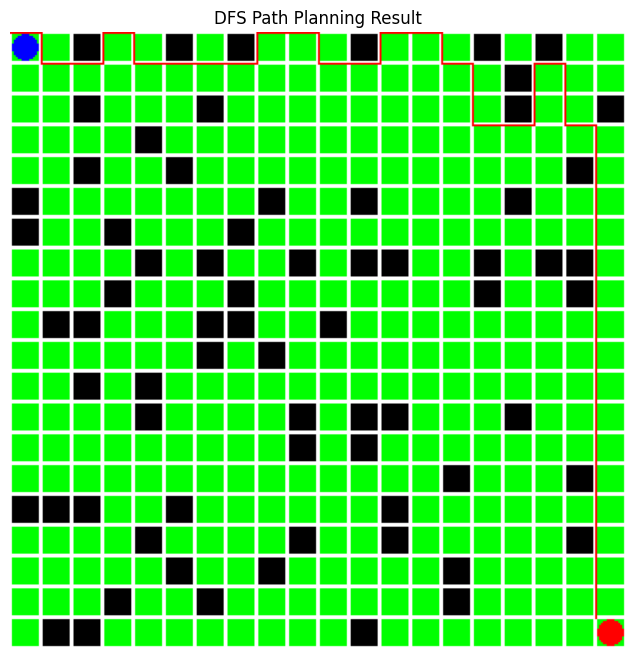

In [10]:
# 生成70个随机障碍物
obstacles = generate_random_obstacles(mapsize, 70, pos_snode, pos_enode)

# 使用之前定义的DFS算法寻找路径
path = dfs(pos_snode, pos_enode, obstacles)

if path:
    print("Path found!")
    # 将路径转换为routelist格式
    routelist_dfs = path
else:
    print("No valid path found!")
    routelist_dfs = []

# 保存并显示结果
saveResultImg(mapsize, pos_snode, pos_enode, obstacles, routelist_dfs)

# 显示结果图
plt.figure(figsize=(8, 8))
img = skimage.io.imread('result0.png')
plt.imshow(img)
plt.axis('off')
plt.title('DFS Path Planning Result')
plt.show()

### 3. 基于A*搜索的路径规划

定义启发式函数。

In [11]:
def heuristic(start, goal):
    """
    计算从起点到终点的启发式值（预估代价）
    使用曼哈顿距离（Manhattan distance）作为启发式函数
    
    参数:
        start: 起始节点的坐标，格式为(x, y)
        goal: 目标节点的坐标，格式为(x, y)
        
    返回:
        float: 从start到goal的预估代价
    """
    # 计算x方向上的距离差
    dx = abs(start[0] - goal[0])
    # 计算y方向上的距离差
    dy = abs(start[1] - goal[1])
    # 返回曼哈顿距离
    return dx + dy

定义A*搜索算法

In [12]:
def astar(start, goal, obstacles, mapsize=(20, 20)):
    """
    A*搜索算法实现
    
    参数:
        start: 起始位置坐标 (x, y)
        goal: 目标位置坐标 (x, y)
        obstacles: 障碍物位置列表
        mapsize: 地图大小 (width, height)
        
    返回:
        path: 找到的路径列表，如果没找到则返回None
    """
    # 定义移动方向：上、右、下、左
    directions = [(0, -1), (1, 0), (0, 1), (-1, 0)]
    
    # 创建开放列表和关闭列表
    open_list = []
    closed_set = set()
    
    # 创建起始节点
    start_node = Node(start, 0, heuristic(start, goal))
    open_list.append(start_node)
    
    # 用字典存储每个位置对应的节点
    node_dict = {start: start_node}
    
    def is_valid(pos):
        """检查位置是否有效"""
        x, y = pos
        return (0 <= x < mapsize[0] and 
                0 <= y < mapsize[1] and 
                pos not in obstacles)
    
    while open_list:
        # 获取f值最小的节点
        current_node = min(open_list)
        current_pos = current_node.position
        
        # 如果到达目标，构建并返回路径
        if current_pos == goal:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]  # 反转路径，从起点到终点
        
        # 将当前节点从开放列表移到关闭列表
        open_list.remove(current_node)
        closed_set.add(current_pos)
        
        # 检查所有相邻节点
        for dx, dy in directions:
            next_pos = (current_pos[0] + dx, current_pos[1] + dy)
            
            # 检查位置是否有效且未被访问
            if not is_valid(next_pos) or next_pos in closed_set:
                continue
            
            # 计算从起点经过当前节点到相邻节点的代价
            g_cost = current_node.g_cost + 1
            
            # 如果是新节点或找到更好的路径
            if next_pos not in node_dict or g_cost < node_dict[next_pos].g_cost:
                # 创建新节点或更新现有节点
                h_cost = heuristic(next_pos, goal)
                neighbor = Node(next_pos, g_cost, h_cost)
                neighbor.parent = current_node
                node_dict[next_pos] = neighbor
                
                # 如果节点不在开放列表中，添加它
                if neighbor not in open_list:
                    open_list.append(neighbor)
    
    # 如果没有找到路径，返回None
    return None

在实验中，利用之前生成的地图，将A*搜索与深度优先搜索算法进行比较。  

Path found!


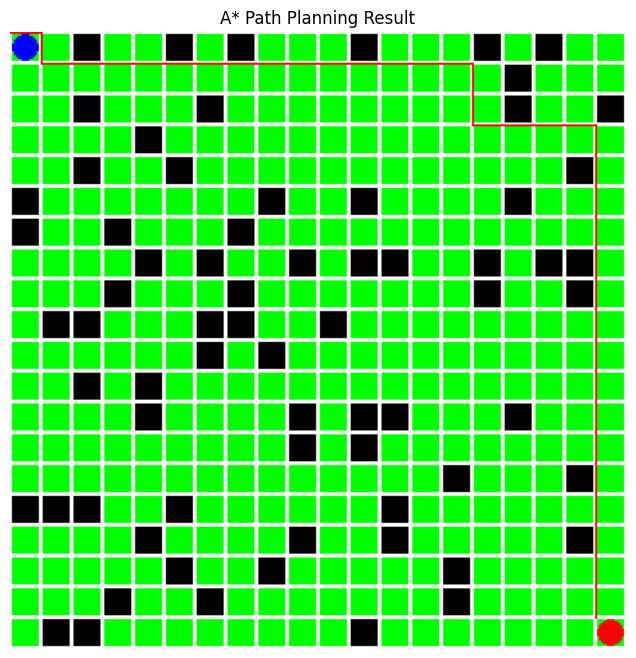

In [13]:
# 使用A*算法寻找路径
path = astar(pos_snode, pos_enode,obstacles)

if path:
    print("Path found!")
    # 将路径转换为routelist格式
    routelist_Astar = path
else:
    print("No valid path found!")
    routelist_Astar = []

# 保存并显示结果
saveResultImg(mapsize, pos_snode, pos_enode, obstacles, routelist_Astar)

# 显示结果图
plt.figure(figsize=(8, 8))
img = skimage.io.imread('result0.png')
plt.imshow(img)
plt.axis('off')
plt.title('A* Path Planning Result')
plt.show()

## 四、 重复进行对比实验

重复进行5次对比实验，每次实验中，随机布置70各障碍物的位置，机器人的初始位置和目标位置不变。分别用深度优先搜索与A*算法求解路径，并将实验结果进行对比分析。


Experiment 1
DFS: Path found!
DFS path length: 51
A*: Path found!
A* path length: 39


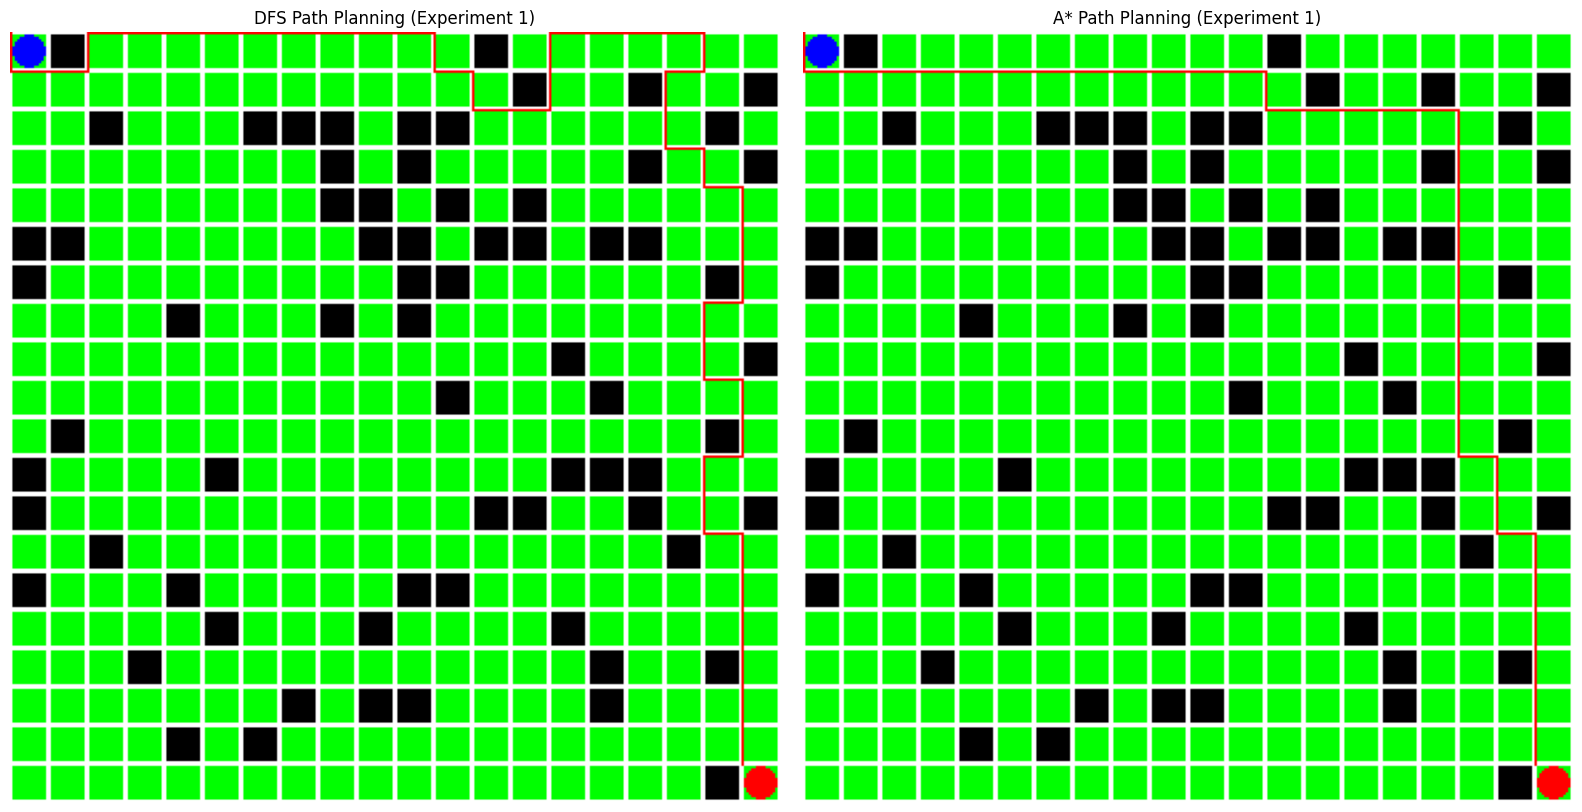


Experiment 2
DFS: Path found!
DFS path length: 55
A*: Path found!
A* path length: 39


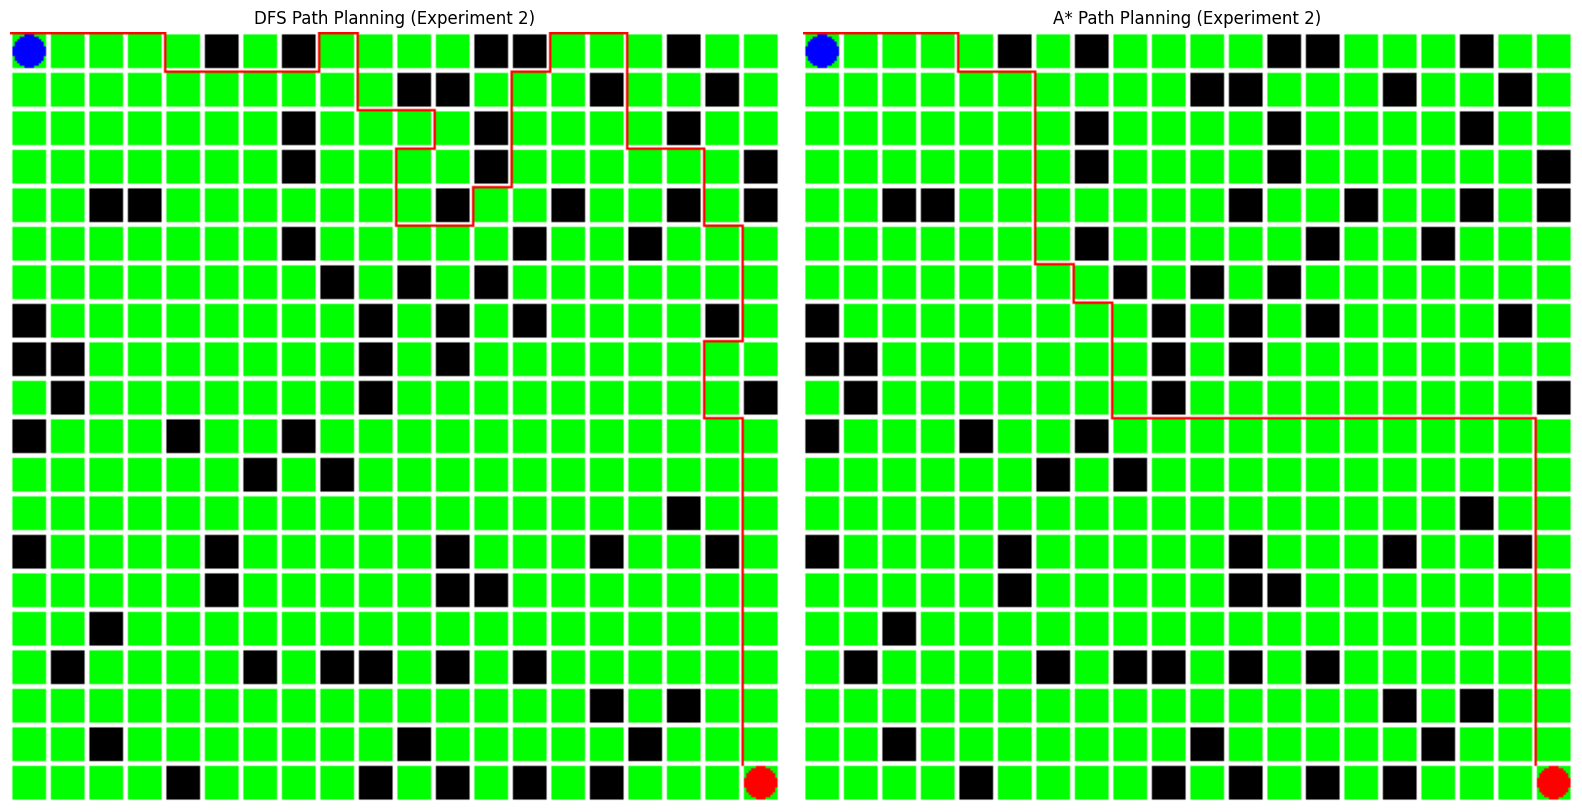


Experiment 3
DFS: Path found!
DFS path length: 89
A*: Path found!
A* path length: 39


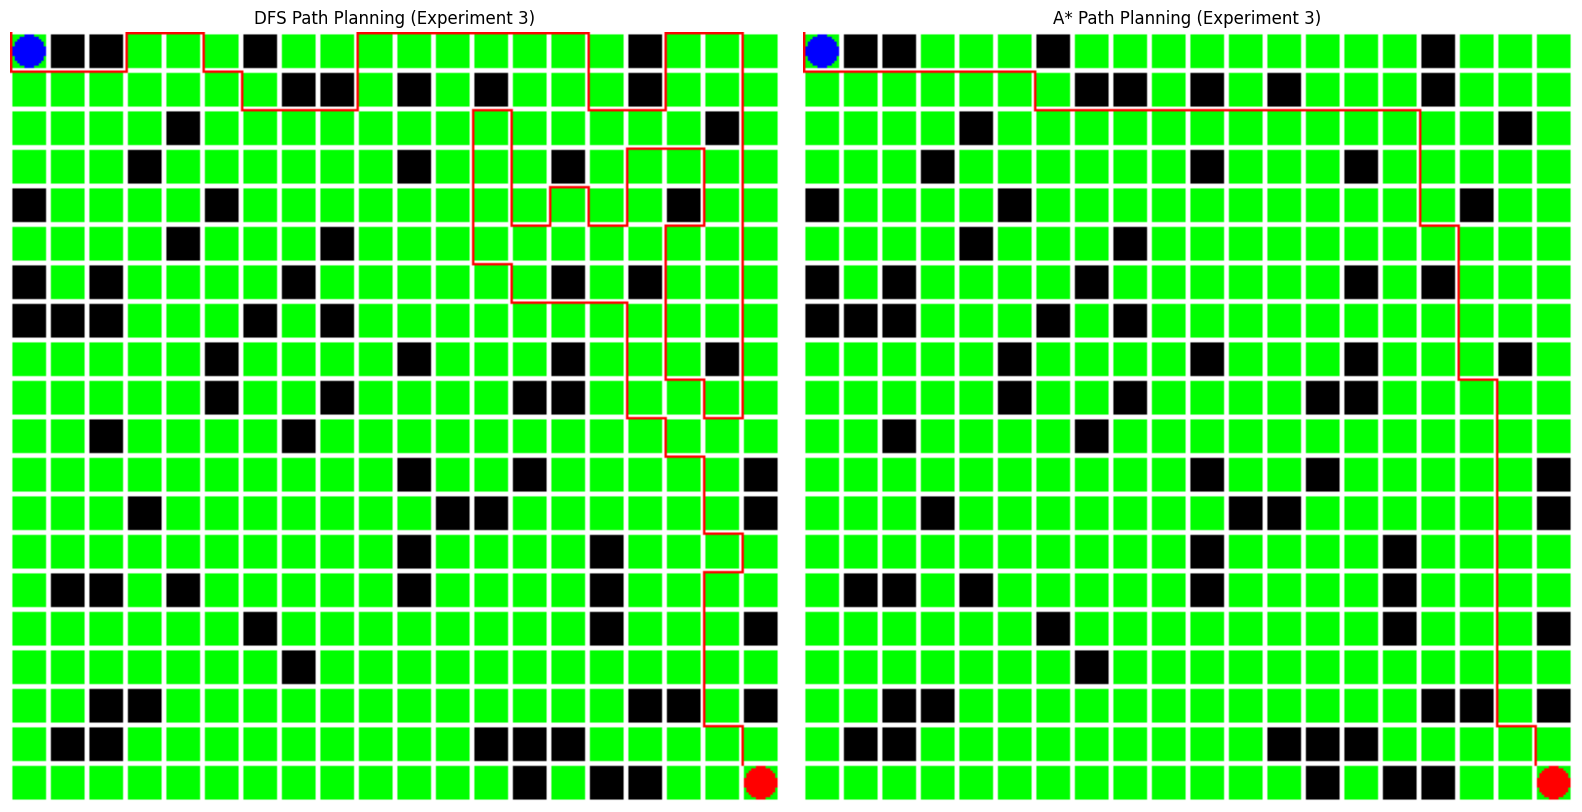


Experiment 4
DFS: Path found!
DFS path length: 105
A*: Path found!
A* path length: 39


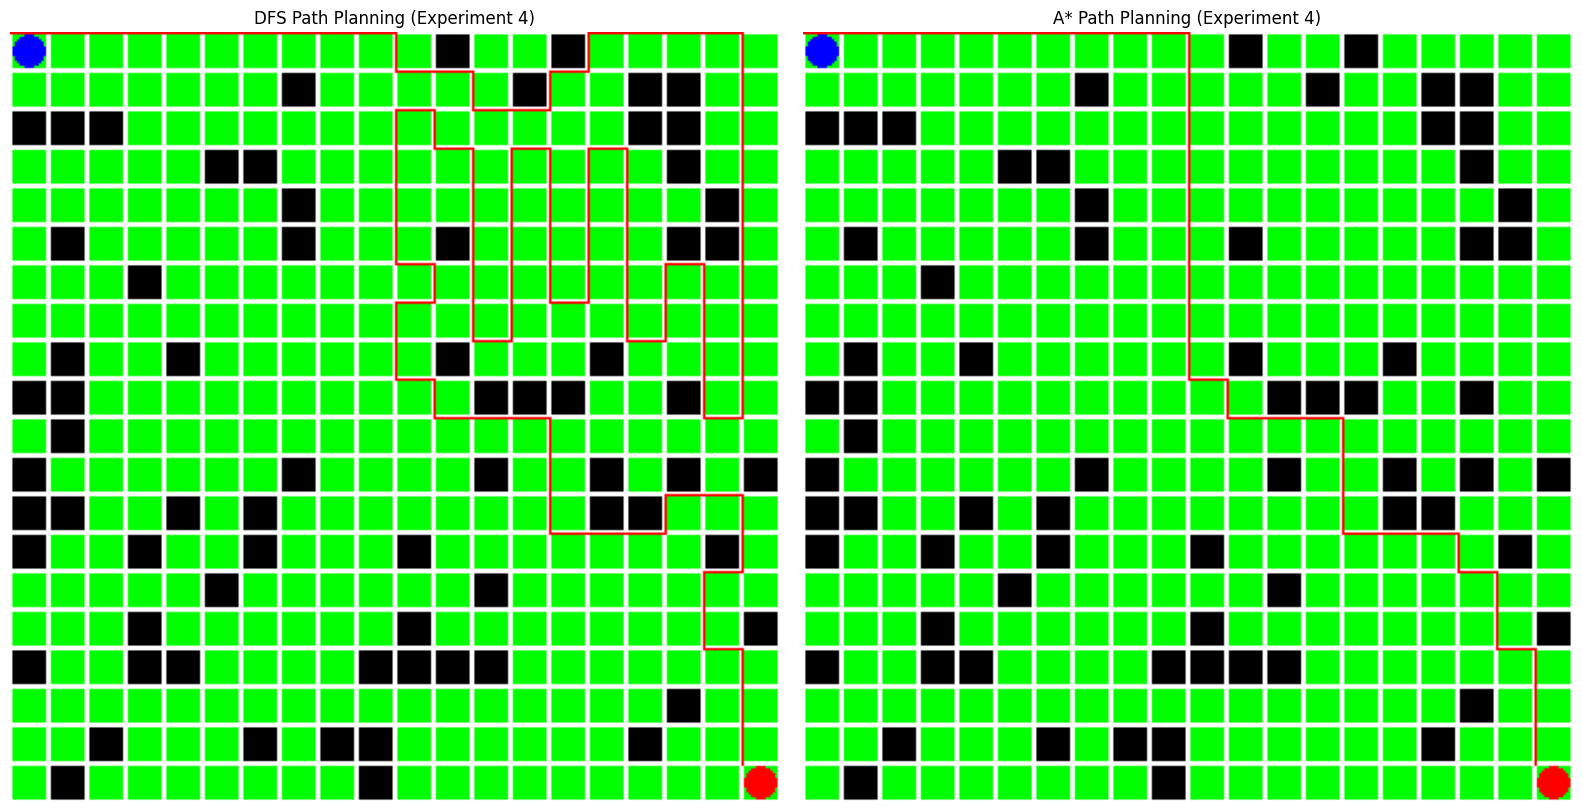


Experiment 5
DFS: Path found!
DFS path length: 51
A*: Path found!
A* path length: 39


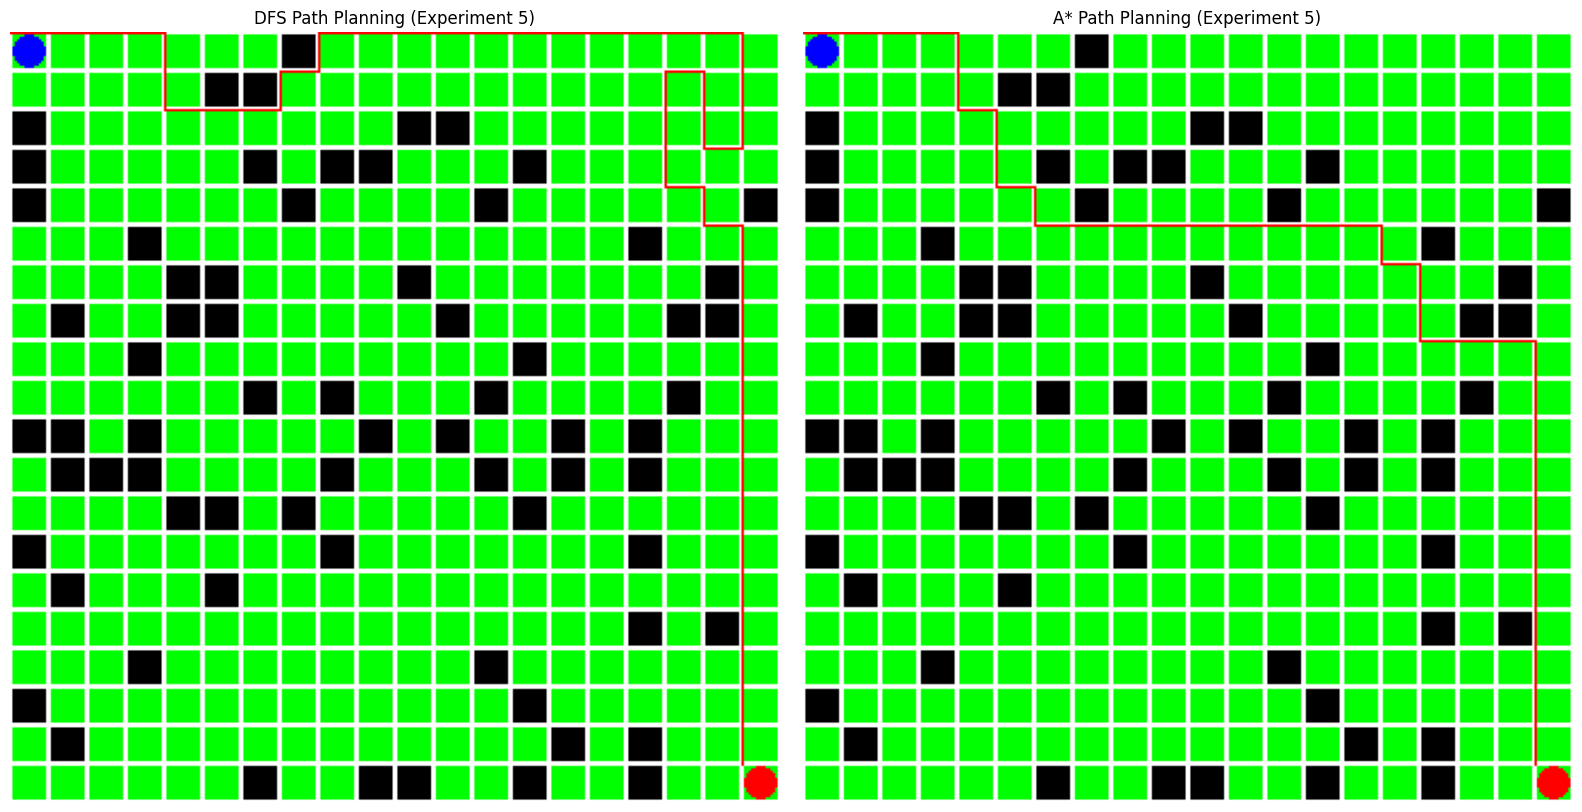

In [14]:
# 进行5次重复实验
for experiment_num in range(5):
    print(f"\nExperiment {experiment_num + 1}")
    
    # 随机生成70个障碍物
    obstacles = generate_random_obstacles(mapsize, 70, pos_snode, pos_enode)
    
    # 创建子图布局
    plt.figure(figsize=(16, 8))
    
    # DFS算法路径规划
    path_dfs = dfs(pos_snode, pos_enode, obstacles)
    if path_dfs:
        print("DFS: Path found!")
        routelist_dfs = path_dfs
        print(f"DFS path length: {len(path_dfs)}")
    else:
        print("DFS: No valid path found!")
        routelist_dfs = []
    
    # 保存并显示DFS结果
    plt.subplot(1, 2, 1)
    saveResultImg(mapsize, pos_snode, pos_enode, obstacles, routelist_dfs)
    img_dfs = skimage.io.imread('result0.png')
    plt.imshow(img_dfs)
    plt.axis('off')
    plt.title(f'DFS Path Planning (Experiment {experiment_num + 1})')
    
    # A*算法路径规划
    path_astar = astar(pos_snode, pos_enode, obstacles)
    if path_astar:
        print("A*: Path found!")
        routelist_astar = path_astar
        print(f"A* path length: {len(path_astar)}")
    else:
        print("A*: No valid path found!")
        routelist_astar = []
    
    # 保存并显示A*结果
    plt.subplot(1, 2, 2)
    saveResultImg(mapsize, pos_snode, pos_enode, obstacles, routelist_astar)
    img_astar = skimage.io.imread('result0.png')
    plt.imshow(img_astar)
    plt.axis('off')
    plt.title(f'A* Path Planning (Experiment {experiment_num + 1})')
    
    plt.tight_layout()
    plt.show()

## 五、实验结果分析

双击此处添加你对本次实验结果的分析和思考。

## 六、扩展实验(选做)

扩展实验使用Coppeliasim进行移动机器人仿真。由于涉及到物理仿真，扩展实验不能在云端环境中运行，需要在本地电脑上安装CoppeliaSim软件，并运行实验脚本。实验中，使用了先锋Pioneer 3DX机器人作为实验对象，并随机放置了5个立方体障碍物，机器人的初始位置(-1.5, 1.5)，希望运动到的目标位置为(1.5, -1.5)，实验场景通过运行如下指令可以看到：


In [15]:
import os
_=os.system("start experiment1.ttt")

这里仍然采用A*算法进行机器人路径规划，因此需要设定启发函数，代码如下：

In [16]:
import math
def heuristic(start, goal):
    """
    计算两点之间的欧几里得距离作为启发式值
    
    参数:
        start: 起始点坐标，格式为(x, y)
        goal: 目标点坐标，格式为(x, y)
        
    返回:
        float: 两点之间的欧几里得距离
    """
    # 使用欧几里得距离公式计算两点间距离
    # sqrt((x2-x1)^2 + (y2-y1)^2)
    val = math.sqrt((start[0] - goal[0])**2 + (start[1] - goal[1])**2)
    return val

结合机器人仿真环境，将A*算法实现为：

In [17]:
from heapq import heappush, heappop  # 导入堆操作函数，用于维护优先队列
from pioneer_path_planning import get_neighbors  # 导入获取邻居节点的函数

def a_star(start_pos, goal_pos, obstacles, grid_size=0.5):
    """
    A*路径规划算法实现
    
    参数:
        start_pos: 起始位置坐标 (x, y)
        goal_pos: 目标位置坐标 (x, y)
        obstacles: 障碍物位置列表
        grid_size: 网格大小，默认为0.5
        
    返回:
        path: 找到的路径列表，如果没找到则返回None
    """
    # 创建起始节点并计算其启发式值
    start_node = Node(start_pos, 0)
    start_node.h_cost = heuristic(start_pos, goal_pos)
    
    # 初始化开放列表（待探索的节点）和关闭集合（已探索的节点）
    open_list = []
    closed_set = set()
    heappush(open_list, start_node)  # 将起始节点加入开放列表
    nodes = {start_pos: start_node}  # 用字典存储所有已创建的节点
    
    while open_list:
        # 获取f值最小的节点
        current = heappop(open_list)
        
        # 检查是否到达目标点附近（考虑网格大小的误差）
        if heuristic(current.position, goal_pos) < grid_size:
            # 构建从终点到起点的路径
            path = []
            while current:
                path.append(current.position)
                current = current.parent
            return path[::-1]  # 反转路径，返回从起点到终点的路径
            
        # 将当前节点加入关闭集合
        closed_set.add(current.position)
        
        # 获取并遍历当前节点的所有邻居节点
        for neighbor_pos in get_neighbors(current.position, goal_pos, grid_size, heuristic_func=heuristic):
            # 检查邻居节点是否与障碍物碰撞
            if any(heuristic(neighbor_pos, obs) < grid_size for obs in obstacles):
                continue
                
            # 计算从起点经过当前节点到达邻居节点的代价
            g_cost = current.g_cost + heuristic(current.position, neighbor_pos)
            
            # 如果是新节点，创建并存储
            if neighbor_pos not in nodes:
                neighbor = Node(neighbor_pos)
                nodes[neighbor_pos] = neighbor
            else:
                neighbor = nodes[neighbor_pos]
                
            # 如果邻居节点已经在关闭集合中，跳过
            if neighbor.position in closed_set:
                continue
                
            # 如果找到更好的路径，更新节点信息
            if g_cost < neighbor.g_cost:
                neighbor.g_cost = g_cost  # 更新g值
                neighbor.h_cost = heuristic(neighbor_pos, goal_pos)  # 更新h值
                neighbor.parent = current  # 更新父节点
                heappush(open_list, neighbor)  # 将节点加入开放列表
    
    # 如果没有找到路径，返回None
    return None

这时就可以开始进行机器人运动仿真了，运行下面代码前需要首先在CoppeliaSim中点击仿真开始按钮，然后再运行最后一段代码。如果没有找到合适的路径，可以多次运行最后一段代码，直到找到合适的路径。一旦最后一段代码运行起来了以后，可以转到CoppeliaSim中，观察机器人的运动过程。

![点击启动仿真按钮](开始仿真按钮.png)

In [18]:
from pioneer_path_planning import runSimulation
runSimulation(search_func=a_star)

Failed to connect to CoppeliaSim


SystemExit: 

d:\ProgramData\Miniconda3\envs\torch_env2\lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
